In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score

### 1) predit the house prices of the given data set

In [3]:
# reading the data
house_data=pd.read_csv("House_prediction_data.csv")
house_data # print the data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


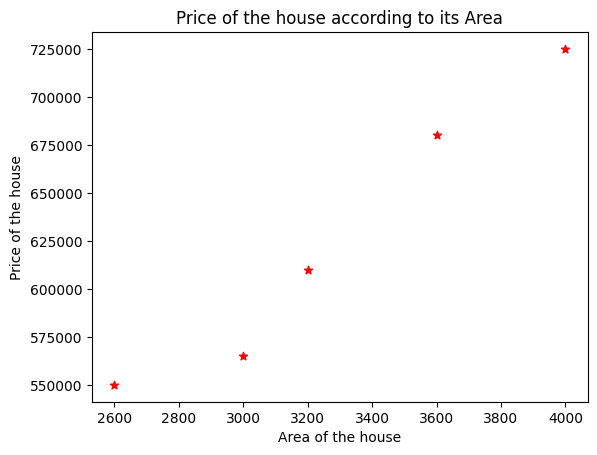

In [4]:
# some insights using scatter plot
plt.scatter(house_data.area, house_data.price, color='r', marker='*')
plt.title("Price of the house according to its Area")
plt.xlabel("Area of the house")
plt.ylabel("Price of the house")
plt.show()

In [5]:
# now training the model
price_model=LinearRegression()
price_model.fit(house_data[['area']], house_data['price'])

LinearRegression()

In [6]:
# now making the predictions
price_model.predict([[3300]]) # here 3300 is the price of the house the predicted value will be the area of the house

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [7]:
price_prediction=price_model.predict(house_data[['area']])

In [8]:
# accuracy of the model
price_model_accuracy=r2_score(house_data['price'],price_prediction)
price_model_accuracy*100

95.84301138199486

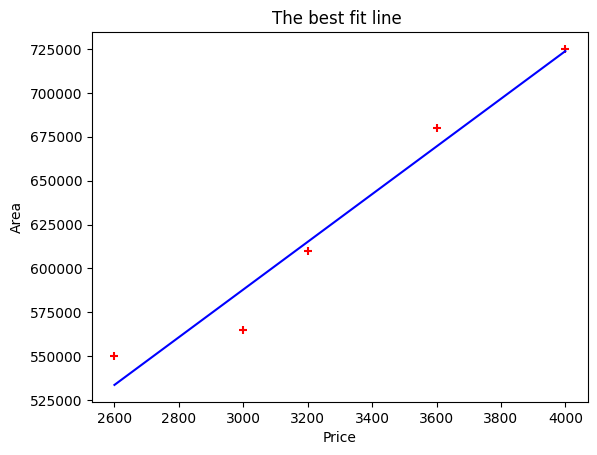

In [9]:
# now analyzing the best fit line with the predicted values
plt.scatter(house_data['area'], house_data['price'], marker='+', color='r')
plt.plot(house_data['area'],price_prediction, color='b')
plt.title("The best fit line ")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

### Finding the best fit line manually by writing a code

In [32]:
# some of the formulas are as under

# mse=(1/n) * sum(yi - y^)**2    # here y^ = mx + b
# par_der_m = (2/n) * sum(- xi (yi - y^))
# par_der_b = (2/n) * sum(_(yi - y^))
# m = m - LearningRate * par_der_m
# b = b - LearningRate * par_der_b

# now we have to separate the x and y values
x=house_data.area
y=house_data.price

# now applying the function
def Gradient_descent(x, y):
    # first we have to start from some random value of m and b
    m_curr =0
    b_curr=0

    # now we have to define the learning rate
    l_rate=0.001

    # now define the number of iterations
    iterations=10

    # the value of n
    n=len(x) # the len(x)=len(y) must

    # loop around the number of iterations
    for i in range(iterations):
        # calculte the y^
        y_pred = m_curr * x + b_curr

        # to find the cost of the algorithm
        cost=(1/n)*sum([val**2 for val in (y-y_pred)])

        # now finding the derivatives
        m_der=-(2/n)*sum(x*(y-y_pred))
        b_der=-(2/n)*sum((y-y_pred))

        # once we have derivatives we can find the values of m and b
        m_curr=m_curr-l_rate*m_der
        b_curr=b_curr-l_rate*b_der

        # now print the results
        print('m {}     , b {}      , cost {}       , iteration {}'.format(m_curr, b_curr, cost, i))

Gradient_descent(x, y)

m 4170000.0     , b 1252.0      , cost 396370000000.0       , iteration 0
m -91664948213.12     , b -27352698.504      , cost 1.9112143454351445e+20       , iteration 1
m 2015070740172719.5     , b 601294763536.9602      , cost 9.235988716823101e+28       , iteration 2
m -4.429730402570638e+19     , b -1.321826396335778e+16      , cost 4.463313483462505e+37       , iteration 3
m 9.73787721108915e+23     , b 2.905771225811984e+20      , cost 2.1569068415352584e+46       , iteration 4
m -2.140677737932321e+28     , b -6.387757454506148e+24      , cost 1.0423303539621707e+55       , iteration 5
m 4.70585229033351e+32     , b 1.4042208462642065e+29      , cost 5.0370861915277784e+63       , iteration 6
m -1.034487601100903e+37     , b -3.086898961218326e+33      , cost 2.434183865454297e+72       , iteration 7
m 2.274114296000687e+41     , b 6.785930590705593e+37      , cost 1.1763251343215263e+81       , iteration 8
m -4.999185902055357e+45     , b -1.4917512545891555e+42      , cost 5.68

### 2) Predicted the income in the given year

In [11]:
# reading the data
incomes=pd.read_csv("canada_per_capita_income.csv")
incomes.head()

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


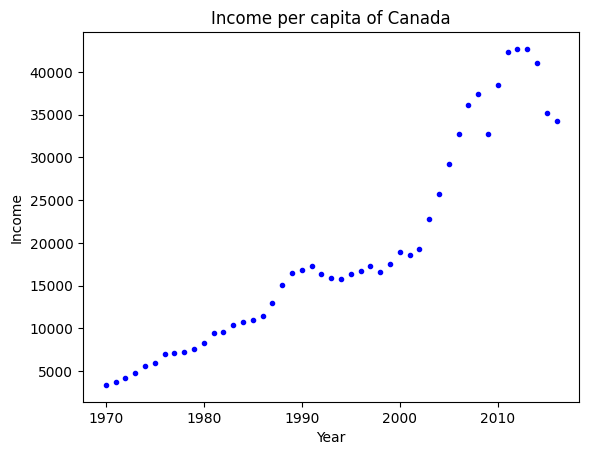

In [12]:
# insights using scatter plot
plt.scatter(incomes['year'], incomes['per_capita_income'], marker='.', color='b')
plt.xlabel("Year")
plt.ylabel("Income")
plt.title("Income per capita of Canada")
plt.show()

In [13]:
# now applying the linear regression algorithm
incomes_model=LinearRegression()
incomes_model.fit(incomes[['year']], incomes['per_capita_income'])

LinearRegression()

In [14]:
# predict the income in the year 2020
incomes_model.predict([[2020]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [15]:
# making all predictions
incomes_model_predictions=incomes_model.predict(incomes[['year']])

In [16]:
# accuracy of the model
incomes_model_accuracy=r2_score(incomes['per_capita_income'],incomes_model_predictions)
incomes_model_accuracy*100

89.0916917957032

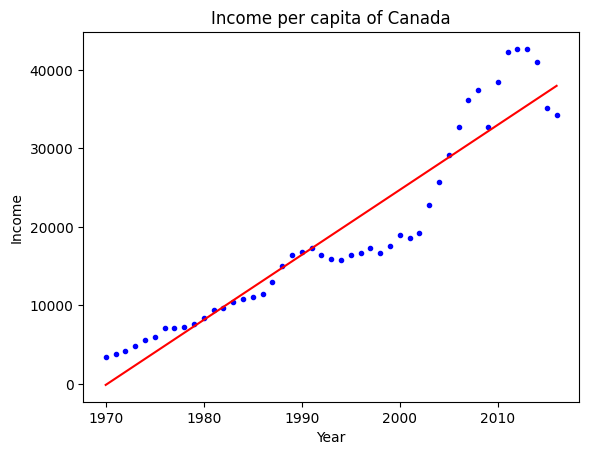

In [17]:
# now skecthing the best fit line
plt.scatter(incomes['year'], incomes['per_capita_income'], marker='.', color='b')
plt.plot(incomes['year'], incomes_model_predictions, color='r')
plt.xlabel("Year")
plt.ylabel("Income")
plt.title("Income per capita of Canada")
plt.show()